In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Unzip the data

In [ ]:
!unzip -q '/content/drive/MyDrive/facial-expression-dataset.zip'

## Import modules

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
from keras.utils import to_categorical
warnings.filterwarnings('ignore')
%matplotlib inline
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [ ]:
# pip install Keras-Preprocessing

## Loading the dataset

In [ ]:
train_dir = '/content/train/train'
test_dir = '/content/test/test'

In [ ]:
def load_dataset(directory):
  image_paths = []
  labels = []
  for label in os.listdir(directory):
    for filename in os.listdir(directory+'/'+label):
      image_path = os.path.join(directory, label, filename)
      image_paths.append(image_path)
      labels.append(label)
    print(label, 'completed')
  return image_paths, labels

In [ ]:
train = pd.DataFrame()
train['image'], train['labels'] = load_dataset(train_dir)
## shuffle data
train = train.sample(frac = 1).reset_index(drop = True)
train.head()

neutral completed
angry completed
fear completed
happy completed
disgust completed
sad completed
surprise completed


,image,labels
0,/content/train/train/happy/Training_53007300.jpg,happy
1,/content/train/train/happy/Training_60579409.jpg,happy
2,/content/train/train/sad/Training_68716255.jpg,sad
3,/content/train/train/happy/Training_28014167.jpg,happy
4,/content/train/train/fear/Training_53631261.jpg,fear


In [ ]:
test = pd.DataFrame()
test['image'], test['labels'] = load_dataset(test_dir)
test.head()

neutral completed
angry completed
fear completed
happy completed
disgust completed
sad completed
surprise completed


,image,labels
0,/content/test/test/neutral/PublicTest_44836790...,neutral
1,/content/test/test/neutral/PublicTest_42666134...,neutral
2,/content/test/test/neutral/PublicTest_44337060...,neutral
3,/content/test/test/neutral/PrivateTest_8168939...,neutral
4,/content/test/test/neutral/PublicTest_86106076...,neutral


## Exploratory Data Analysis

<Axes: xlabel='labels', ylabel='count'>

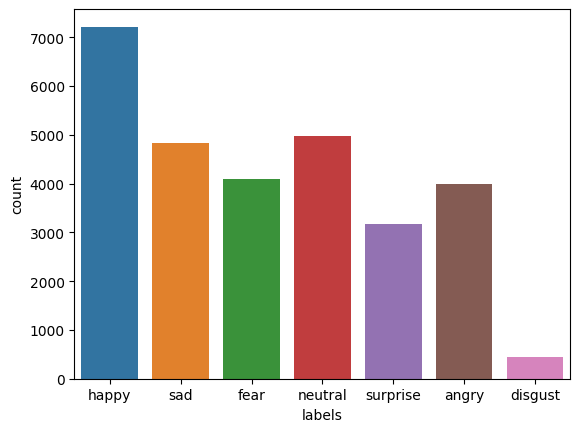

In [ ]:
sns.countplot(x = train['labels'])


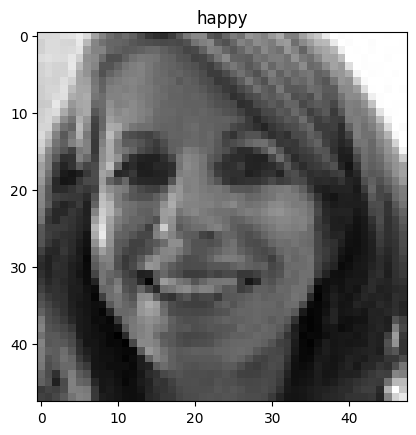

In [ ]:
from PIL import Image
image = Image.open(train['image'][0])
plt.imshow(image, cmap ='gray')
plt.title(train['labels'][0]);

## to display grid of images

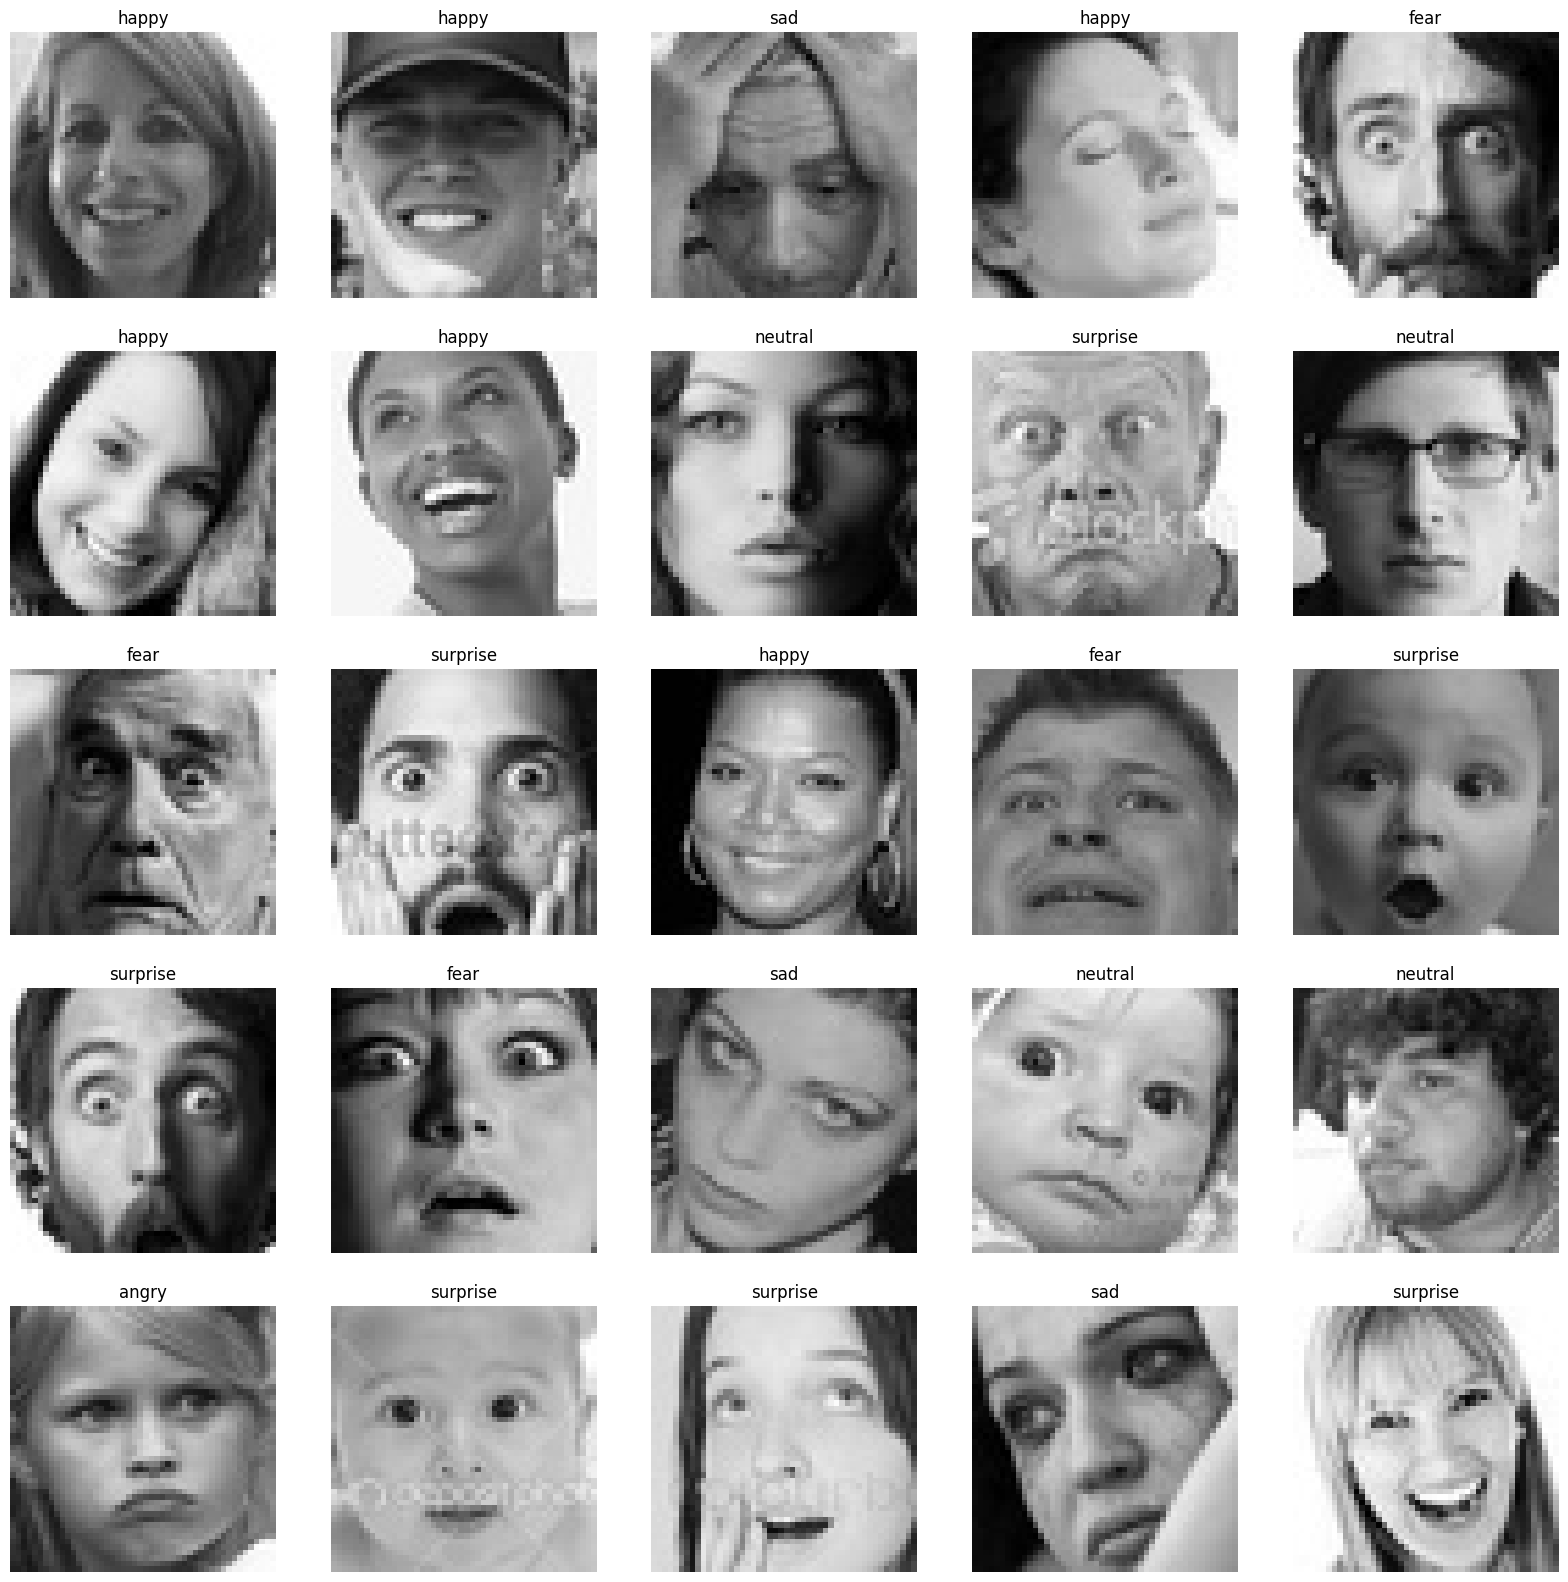

In [ ]:
plt.figure(figsize = (20,20))
files = train.iloc[0:25]
for index, file, label in files.itertuples():
  plt.subplot(5,5, index+1)
  img = tf.keras.utils.load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title(label)
  plt.axis('off')

## Feature Extraction

In [ ]:
def extract_feature(images):
  features = []
  for image in tqdm(images):
    img = tf.keras.utils.load_img(image , grayscale = True)
    img = np.array(img)
    features.append(img)
  features = np.array(features)
  features = features.reshape(len(features),48,48,1)
  return features



In [ ]:
train_features = extract_feature(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [ ]:
test_features = extract_feature(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

## Normalize the image and label encoding

In [ ]:
x_train = train_features/255.0
x_test = test_features/255.0

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['labels'])
y_train = le.transform(train['labels'])
y_test = le.transform(test['labels'])

In [ ]:
y_train = to_categorical(y_train, num_classes = 7)
y_test = to_categorical(y_test, num_classes = 7)

In [ ]:
input_shape = (48,48,1)
output_class = 7


In [ ]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0.], dtype=float32)

## Model Creation

In [ ]:
model = Sequential()
model.add(Conv2D(128, kernel_size =(3,3), activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))


model.add(Conv2D(256, kernel_size =(3,3), activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size =(3,3), activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))


model.add(Conv2D(512, kernel_size =(3,3), activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
## Fully connected
model.add(Dense(512, activation ='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation ='relu'))
model.add(Dropout(0.4))
## output
model.add(Dense(output_class, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 256)       0

In [ ]:
history = model.fit(x = x_train, y = y_train, batch_size = 128, epochs = 100, validation_data= (x_test,y_test))

Epoch 1/100
225/225 [==============================] - 27s 62ms/step - loss: 1.8262 - accuracy: 0.2454 - val_loss: 1.8204 - val_accuracy: 0.2471
Epoch 2/100
225/225 [==============================] - 13s 56ms/step - loss: 1.8067 - accuracy: 0.2509 - val_loss: 1.7765 - val_accuracy: 0.2579
Epoch 3/100
225/225 [==============================] - 13s 56ms/step - loss: 1.7310 - accuracy: 0.2887 - val_loss: 1.6662 - val_accuracy: 0.3305
Epoch 4/100
225/225 [==============================] - 13s 56ms/step - loss: 1.6201 - accuracy: 0.3564 - val_loss: 1.4713 - val_accuracy: 0.4262
Epoch 5/100
225/225 [==============================] - 13s 57ms/step - loss: 1.5154 - accuracy: 0.4101 - val_loss: 1.3778 - val_accuracy: 0.4730
Epoch 6/100
225/225 [==============================] - 13s 59ms/step - loss: 1.4531 - accuracy: 0.4398 - val_loss: 1.3246 - val_accuracy: 0.4833
Epoch 7/100
225/225 [==============================] - 13s 57ms/step - loss: 1.4025 - accuracy: 0.4585 - val_loss: 1.2894 - val_ac

## plotting the acccuracy

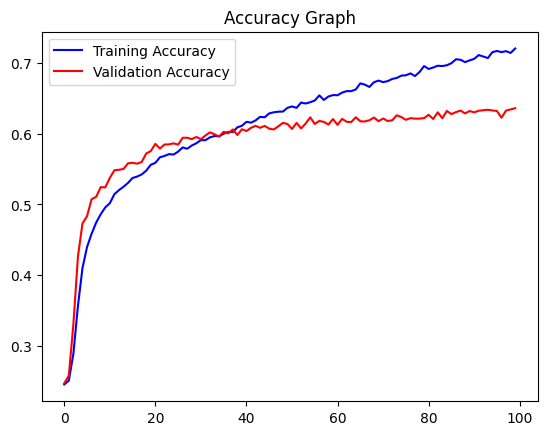

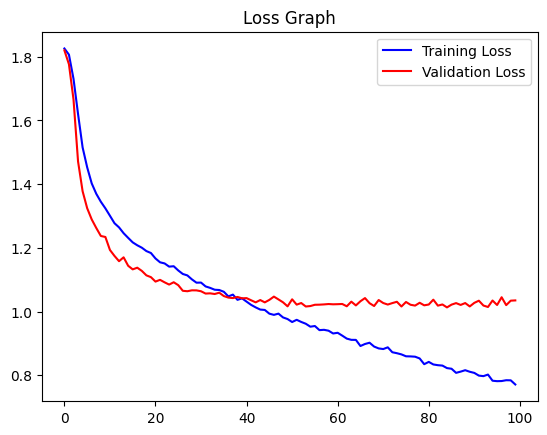

In [ ]:
## Getting the accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

## Getting the loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()


## Test with Image Data

Original Output: neutral
1/1 [==============================] - 0s 18ms/step
Predicted Output neutral


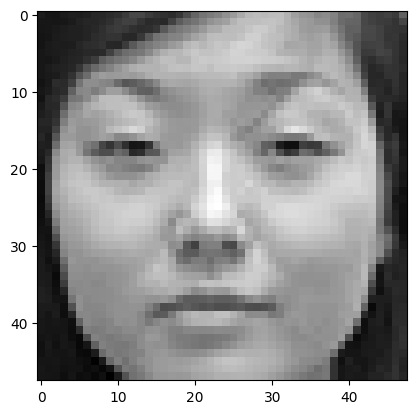

In [ ]:
import random
image_index = random.randint(0, len(test))
print('Original Output:', test['labels'][image_index])
pred = model.predict(x_test[image_index].reshape(1,48,48,1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print('Predicted Output', prediction_label)
plt.imshow(x_test[image_index].reshape(48,48), cmap = 'gray');

Original Output: happy
1/1 [==============================] - 0s 116ms/step
Predicted Output happy


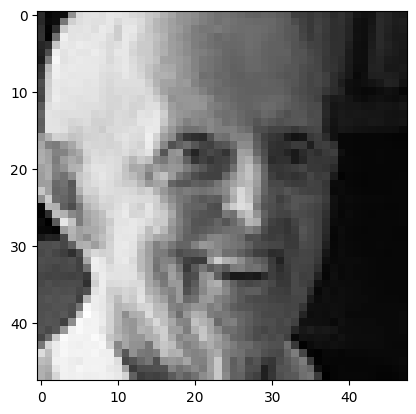

In [ ]:
image_index = random.randint(0, len(test))
print('Original Output:', test['labels'][image_index])
pred = model.predict(x_test[image_index].reshape(1,48,48,1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print('Predicted Output', prediction_label)
plt.imshow(x_test[image_index].reshape(48,48), cmap = 'gray');